Lab One

In [2]:
# general
import os
import numpy as np
import pandas as pd

# plots
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from IPython.display import Image

# predictions
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [5]:
drivers = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/drivers.csv")
driver_standings = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/driver_standings.csv", sep = ",")
driver_results = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/results.csv")
lap_times = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/lap_times.csv")
pit_stops = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/pit_stops.csv")
qualifying = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/qualifying.csv")
races = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/races.csv")
sprint_results = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/sprint_results.csv")
status = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/status.csv")
constructors = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/constructors.csv")
constructor_standings = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/constructor_standings.csv")
constructor_results = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/constructor_results.csv")
circuits = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/circuits.csv")

In [26]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [27]:
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33902 entries, 0 to 33901
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33902 non-null  int64  
 1   raceId             33902 non-null  int64  
 2   driverId           33902 non-null  int64  
 3   points             33902 non-null  float64
 4   position           33902 non-null  int64  
 5   positionText       33902 non-null  object 
 6   wins               33902 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [25]:
driver_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [31]:
lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538121 entries, 0 to 538120
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        538121 non-null  int64 
 1   driverId      538121 non-null  int64 
 2   lap           538121 non-null  int64 
 3   position      538121 non-null  int64 
 4   time          538121 non-null  object
 5   milliseconds  538121 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.6+ MB


In [45]:
pit_stops.info()
pit_stops.milliseconds.mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        9634 non-null   int64 
 1   driverId      9634 non-null   int64 
 2   stop          9634 non-null   int64 
 3   lap           9634 non-null   int64 
 4   time          9634 non-null   object
 5   duration      9634 non-null   object
 6   milliseconds  9634 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 527.0+ KB


72401.7306414781

In [35]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9575 non-null   int64 
 1   raceId         9575 non-null   int64 
 2   driverId       9575 non-null   int64 
 3   constructorId  9575 non-null   int64 
 4   number         9575 non-null   int64 
 5   position       9575 non-null   int64 
 6   q1             9567 non-null   object
 7   q2             9424 non-null   object
 8   q3             9276 non-null   object
dtypes: int64(6), object(3)
memory usage: 673.4+ KB


In [46]:
races.info()
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1102 non-null   int64 
 1   year         1102 non-null   int64 
 2   round        1102 non-null   int64 
 3   circuitId    1102 non-null   int64 
 4   name         1102 non-null   object
 5   date         1102 non-null   object
 6   time         1102 non-null   object
 7   url          1102 non-null   object
 8   fp1_date     1102 non-null   object
 9   fp1_time     1102 non-null   object
 10  fp2_date     1102 non-null   object
 11  fp2_time     1102 non-null   object
 12  fp3_date     1102 non-null   object
 13  fp3_time     1102 non-null   object
 14  quali_date   1102 non-null   object
 15  quali_time   1102 non-null   object
 16  sprint_date  1102 non-null   object
 17  sprint_time  1102 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.1+ KB
<class 'pandas.core.

In [22]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [59]:
#constructors.head()
constructor_standings.head()
#constructor_standings.info()
#constructor_results.head()
#constructor_results.info()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


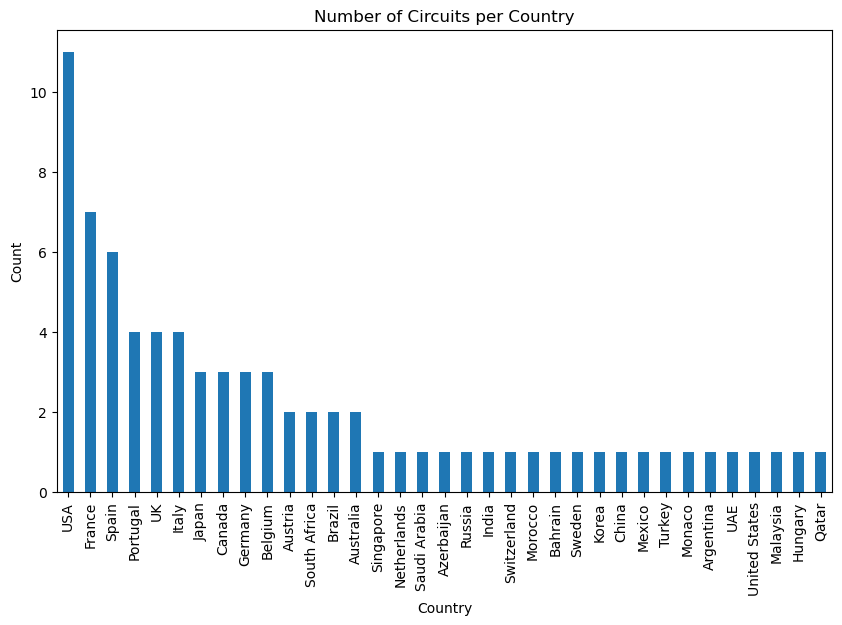

In [21]:

country_counts = circuits['country'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Circuits per Country')
plt.show()